<a href="https://colab.research.google.com/github/maihao14/Earthquake-Arrivals-Dataset-for-AI/blob/main/QuakeLabeler_Intro_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Prepare an Earthquake Dataset via QuakeLabeler

In this notebook we will introduce how to design an Earthquake dataset from online earthquake cataloge clients by using our Python package: QuakeLabler.
[For more details, view QuakeLabeler GitHub repository](https://github.com/maihao14/QuakeLabeler)

# Step 0: Preparation | Installation
Install essential packages 
Here we directly clone QuakeLabeler package from GitHub repository. `QuakeLabeler` will install dependency packages, i.e., ObsPy, PyGMT, requestes,etc., simultaneously. 

### Install conda


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

## Install dependent package: PyGMT
Installation of PyGMT in Google Colab is tricky. <br>
Thanks to Author: [A.L. Belem](mailto:andrebelem@id.uff.br) @ [Oceanographic Observatory](http://www.observatoiriooceanografico.uff.br) 2021 (version 1)<br>
Create this notebook made for students in the **Climate Change and its Impacts** class (and for those more interested in) using [PyGMT](https://www.pygmt.org/latest/) to produce their figures. The challenge here was to use the new [GMT6](https://www.generic-mapping-tools.org/) with PyGMT in the COLAB environment (without having to install python locally).<br>

The lines below can work separately or together. The suggestion is that you keep running each line and studying both its content and the result. Copy to your Google Drive and modify as necessary (in addition to including your own annotations).<br>

This Notebook is designed to be used in **Google Colab**, but it also fits the Jupyter Notebook or Jupyter Lab. Just skip the installation part and go straight to the pygmt code if you have already installed everything on your desktop.

In [ ]:

# cite from GitHub@andrebelem  
# https://github.com/andrebelem/pythonverse/blob/main/PyGMT_on_COLAB.ipynb

%%capture
!sudo apt update 
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

In [ ]:
# install pygmt with pip
%%capture
!pip install pygmt

## Check if installation sucessfully

In [ ]:
import pygmt
pygmt.show_versions()

PyGMT information:
  version: v0.4.1
System information:
  python: 3.7.11 (default, Jul  3 2021, 18:01:19)  [GCC 7.5.0]
  executable: /usr/bin/python3
  machine: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Dependency information:
  numpy: 1.19.5
  pandas: 1.1.5
  xarray: 0.18.2
  netCDF4: 1.5.7
  packaging: 21.0
  ghostscript: 9.26
  gmt: 6.3.0_07415a7_2021.09.04
GMT library information:
  binary dir: /usr/bin
  cores: 2
  grid layout: rows
  library path: /usr/local/lib/libgmt.so
  padding: 2
  plugin dir: /usr/local/lib/gmt/plugins
  share dir: /usr/local/share
  version: 6.3.0


# Step 1: Install QuakeLabeler
QuakeLabeler includes all other dependencies. 

In [ ]:
!git clone https://github.com/maihao14/QuakeLabeler.git
%cd QuakeLabeler/
!pip install .
%cd ..

Cloning into 'QuakeLabeler'...
remote: Enumerating objects: 692, done.
remote: Counting objects: 100% (692/692), done.
remote: Compressing objects: 100% (441/441), done.
remote: Total 692 (delta 349), reused 551 (delta 228), pack-reused 0
Receiving objects: 100% (692/692), 7.76 MiB | 21.71 MiB/s, done.
Resolving deltas: 100% (349/349), done.
/content/QuakeLabeler
Processing /content/QuakeLabeler
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 24.7 MB 56 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing whe

# Step 2: Import QuakeLabeler packages  
Import `QuakeLabeler`. 

In [ ]:
# import package
from quakelabeler import *
print("Import package finished!")

Import package finished!


## Enable file browsing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

# Step 3: Run QuakeLabeler | Running mode selection
Three optional running modes are implemented in QuakeLabeler.


*   Beginner
*   Advanced
*   Benchmark

Here we create a new folder named `QLTest` to try `Beginner` mode.


## Example: Collect global earthquakes in 2018
Here we query earthquake events from worldwide range. All natural events will be downloaded as a series of arrival-based catalog. \\
Data source: [ISC Arrivals Bulletin ](http://isc-mirror.iris.washington.edu/iscbulletin/search/arrivals/#amplitudes)
Annual global earthquake catalog has less query parameters so that it has a fast response speed from ISC website.
Note that [ISC Arrivals Bulletin ](http://isc-mirror.iris.washington.edu/iscbulletin/search/arrivals/#amplitudes) has a limitation of maxmimum 60,000 events at each search. We spilt one year research as two parts (Jan-01 to June 15, June 16 - Dec 31).


In [ ]:
!mkdir QLTest
%cd QLTest

/content/QLTest


## Example: Beginner mode
`Beginner` mode includes several instances of defined earthuake catalog. Select one case then QuakeLabeler will create search request form automatically.


In [ ]:
# start Interactive interface
user_interface = Interactive()

Welcome to QuakeLabeler----Fast AI Earthquake Dataset Deployment Tool!

   ____              _        _           _          _
  / __ \            | |      | |         | |        | |
 | |  | |_   _  __ _| | _____| |     __ _| |__   ___| | ___ _ __
 | |  | | | | |/ _` | |/ / _ \ |    / _` | '_ \ / _ \ |/ _ \ '__|
 | |__| | |_| | (_| |   <  __/ |___| (_| | |_) |  __/ |  __/ |
  \___\_\__,_|\__,_|_|\_\___|______\__,_|_.__/ \___|_|\___|_|
        
QuakeLabeler provides multiple modes for different levels of Seismic AI researchers 
 
[Beginner]  mode -- Quick start dataset recipes in small, middle, large scales. 
[Advanced]  mode -- Custom all details in your dataset. 
[Benchmark] mode -- Built-in standard seismic datasets in scales.
Please select a mode: [1/2/3/Beginner/Advanced/Benchmark] 1
Initialize Beginner Mode...
Select one of the following sample fields:  [1/2/3/4] 
                       [1] 2010 Cascadia subduction zone earthquake activities (M > 3.0) 
                       [2] 2

## Send search request to ISC arrivals bulletin website
Here we query earthquake events from 2011 Tōhoku earthquake and tsunami. All natural events will be downloaded as a series of arrival-based catalog. \\
Data source: [ISC Arrivals Bulletin ](http://isc-mirror.iris.washington.edu/iscbulletin/search/arrivals/#amplitudes)
 

In [ ]:
query = QueryArrival(**user_interface.params)

Loading time varies on your network connections, search region scale, time range, etc. Please be patient, estimated time: 3 mins 
Request completed！！！
310 events have been found!
Query time is 5 seconds.


## Create earthquake maps

In [ ]:
query.record_folder

'/content/QLTest/recordings31/'

In [ ]:
# cannot find gmap-stations.txt

grdimage [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdimage [NOTICE]: Earth Relief at 20x20 arc minutes from Gaussian Cartesian filtering (37 km fullwidth) of SRTM15+V2.1 [Tozer et al., 2019].
grdimage [NOTICE]:   -> Download grid file [831K]: earth_relief_20m_p.grd
coast [NOTICE]: Downloading binned_GSHHS_f.nc for the first time - be patient
coast [NOTICE]: Downloading binned_border_f.nc for the first time - be patient
/usr/local/lib/python3.7/dist-packages/quakelabeler/classes.py:2440: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  pen="black"


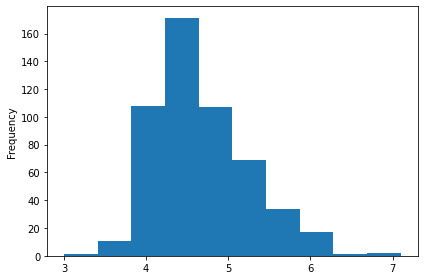

In [ ]:
MT = MergeMetadata(query.record_folder) 
filelist = MT.select_folder()
temp_pd = MT.merge_event(filelist)
event_pd = MT.event_clean(temp_pd)
# test station modules
total_station = MT.merge_station(filelist)
#sta_cat = MT.station_clean(total_station)  
GM = GlobalMaps(total_station,event_pd)
# display magnitude distribution
GM.hist_plot(event_pd)


Show event map

In [ ]:
GM.event_map(event_pd)   

/usr/local/lib/python3.7/dist-packages/quakelabeler/classes.py:2440: FutureWarning: The 'sizes' parameter has been deprecated since v0.4.0 and will be removed in v0.6.0. Please use 'size' instead.
  pen="black"


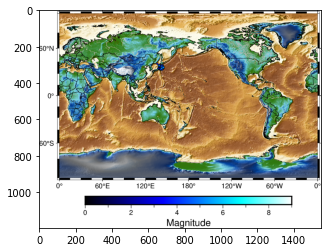

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/QLTest/global_event_map.png')
plt.imshow(img)


## Input custom options
In this instance (`Beginner` mode), 4 different recipes is provided. If you want to design your own dataset structures, please use `Advanced` mode.

In [ ]:
# init custom options    
custom = CustomSamples(user_interface.receipe_flag)
# run custom of dataset structure
custom.init()

             _      _             _               _                   _            
 __ _  _  _ (_) __ | |__ ___  ___| |_  __ _  _ _ | |_   _ _  ___  __ (_) _ __  ___ 
/ _` || || || |/ _|| / /|___|(_-<|  _|/ _` || '_||  _| | '_|/ -_)/ _|| || '_ \/ -_)
\__, | \_,_||_|\__||_\_\     /__/ \__|\__,_||_|   \__| |_|  \___|\__||_|| .__/\___|
   |_|                                                                  |_|        


Quick-start recipe lists specific dataset structures of the
current popular open-source AI/ML models on GitHub. Follow
these recipes; users can generate the same forms of the datasets
in QuakeLabeler with different scales (small, middle, large).
                  
Please select the recipe:
Initialize Quick-Start Recipe...
Select one of the following recipe:  [1/2/3/4] 
                       [1] QuakeLabeler Simple Version 
                       [2] QuakeLabeler Delicate Version 
                       [3] PhaseNet Version 
                       [4] EQTransformer Versio

## Building defined dataset
`QuakeLabeler` will run automatically to produce the dataset. \\
Running time decided by the size of the dataset. \\

Currently `Obspy` will fail in Google Colab due to some reason. So the following procedure must be run in your local computer.   

In [ ]:
# autp-production of dataset
auto_dataset = QuakeLabeler(query, custom)
# data collect and process
auto_dataset.fetch_all_waveforms(auto_dataset.recordings)

Initialize samples producer module...


/usr/local/lib/python3.7/dist-packages/quakelabeler/classes.py:590: UserWarning: 50+ continuous failed data requests, please quit process and check your parameters.
  warnings.warn('50+ continuous failed data requests, please quit process and check your parameters.')


KeyboardInterrupt: ignored

Display sample waveforms

In [ ]:
# waveform graph
auto_dataset.waveform_display()

In [ ]:
# stats graph
auto_dataset.stats_figure()

In [ ]:
# create same size of noise waveform
auto_dataset.noisegenerator()

In [ ]:
# record information in csv file
auto_dataset.csv_writer() 

In [ ]:
# assign samples into test and training sub-folder
auto_dataset.subfolder()

## Beginner mode finished!


In [ ]:
def find_all_vars(text, *args):
    r"""Store all arrival information
    This method save all fetched information into `recordings`:
        #. EVENTID
        #. STA
        #. PHASE NAME
        #. ARRIVAL DATE
        #. ARRIVAL TIME
        #. ORIGIN DATE
        #. ORIGIN TIME
        #. EVENT TYPE
        #. EVENT MAG
    """
    ex = r'MAG (.*) '
    all_variables = re.findall(ex, text, re.S)
    all_vars = re.split(r',', all_variables[0])
    #find last index
    for index in range(len(all_vars) - 1, 0, -1):
        if 'STOP' in all_vars[index]:
            break
    # initialization of recording, include all webset information
    recordings = {
    'EVENTID' : [] ,
    'STA' : [],
    'CHN' : [],
    'ISCPHASE' : [],
    'REPPHASE' : [],
    'ARRIVAL_LAT' : [],
    'ARRIVAL_LON' : [],
    'ARRIVAL_ELEV' : [],
    'ARRIVAL_DIST' : [],
    'ARRIVAL_BAZ' : [],
    'ARRIVAL_DATE' : [],
    'ARRIVAL_TIME' : [],
    'ORIGIN_LAT' : [],
    'ORIGIN_LON' : [],
    'ORIGINL_DEPTH' : [],
    'ORIGIN_DATE' : [],
    'ORIGIN_TIME' : [],
    'EVENT_TYPE' :[],
    'EVENT_MAG' : [] }
    pattern = re.compile(r'(?<=event_id=)\d*')
    pattern_sta = re.compile(r'stacode=(.*) target')
    for i in range(0, index, 25):
        recordings['EVENTID'].append(int(pattern.findall(all_vars[i])[0]))
        recordings['STA'].append(pattern_sta.findall(all_vars[i+2])[0])
        recordings['CHN'].append(str.strip(all_vars[i+6]))
        recordings['ISCPHASE'].append(str.strip(all_vars[i+9]))
        recordings['REPPHASE'].append(str.strip(all_vars[i+10]))
        recordings['ARRIVAL_LAT'].append(float(all_vars[i+3]))
        recordings['ARRIVAL_LON'].append(float(all_vars[i+4]))
        recordings['ARRIVAL_ELEV'].append(float(all_vars[i+5]))
        recordings['ARRIVAL_DIST'].append(float(all_vars[i+7]))
        recordings['ARRIVAL_BAZ'].append(float(all_vars[i+8]))
        recordings['ARRIVAL_DATE'].append(str.strip(all_vars[i+11]))
        recordings['ARRIVAL_TIME'].append(str.strip(all_vars[i+12]))
        recordings['ORIGIN_LAT'].append(float(all_vars[i+20]))
        recordings['ORIGIN_LON'].append(float(all_vars[i+21]))
        recordings['ORIGINL_DEPTH'].append(float(all_vars[i+22]))
        recordings['ORIGIN_DATE'].append(str.strip(all_vars[i+18]))
        recordings['ORIGIN_TIME'].append(str.strip(all_vars[i+19]))
        recordings['EVENT_TYPE'].append(str.strip(all_vars[i+24]))
        if str.isspace(re.split('\n', all_vars[i+25])[0]):
            recordings['EVENT_MAG'].append(float('NaN'))
        else:
            recordings['EVENT_MAG'].append(float(re.split('\n', all_vars[i+25])[0]))
    return recordings       

In [ ]:
import re
recordings = find_all_vars(r.text, 'EVENTID', 'STA','CHN',
                               'ISCPHASE','REPPHASE',  
                               'ARRIVAL_LAT', 'ARRIVAL_LON',
                               'ARRIVAL_ELEV','ARRIVAL_DIST','ARRIVAL_BAZ',
                               'ARRIVAL_DATE','ARRIVAL_TIME',
                               'ORIGIN_LAT' ,'ORIGIN_LON','ORIGINL_DEPTH',
                               'ORIGIN_DATE' ,'ORIGIN_TIME',
                               'EVENT_TYPE','EVENT_MAG')

In [ ]:
#%% create DataFrame from dict
import pandas as pd
# numpy to list
# arrlist = recordings.tolist()
data = pd.DataFrame(data=recordings)

In [ ]:
filename = "/content/drive/My Drive/DataSet/" + "global_2013_365_a.csv"
data.to_csv(filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
# copy it there
#!cp example.txt"/content/drive/My Drive/DataSet"


In [ ]:
data.head()

In [ ]:
data.describe()

#Test Different Request Case
## Global Daily Event
## Global Daily Different Levels
## Global Days Event (Maximum: 7, 30, 60,100, 365)


---


## GSN Stations Day Event
## GSN Stations Days Event(Max: 7, 30, 60, 100, 365)
## GSN Different Magnitude Levels



In [ ]:
# request modules
import time

starttime = time.time()
# global station global region 365 days 
global_365 = 'http://www.isc.ac.uk/cgi-bin/web-db-v4?iscreview=on&out_format=CSV&ttime=on&ttres=on&tdef=on&amps=on&phaselist=&sta_list=&stnsearch=GLOBAL&stn_ctr_lat=&stn_ctr_lon=&stn_radius=&max_stn_dist_units=deg&stn_top_lat=&stn_bot_lat=&stn_left_lon=&stn_right_lon=&stn_srn=&stn_grn=&bot_lat=&top_lat=&left_lon=&right_lon=&ctr_lat=&ctr_lon=&radius=&max_dist_units=deg&searchshape=GLOBAL&srn=&grn=&start_year=2018&start_month=7&start_day=31&start_time=00%3A00%3A00&end_year=2019&end_month=8&end_day=01&end_time=00%3A00%3A00&min_dep=&max_dep=&min_mag=&max_mag=&req_mag_type=Any&req_mag_agcy=Any&include_links=on&request=STNARRIVALS'
r = requests.get(global_365)
endtime = time.time()
totaltime = endtime - starttime
print("The running time of request is {0} seconds".format(totaltime))


In [ ]:
print(r.text[:5000])

# How to save files in COLAB
## Running performance
## Running limitations

# MergeMetadata
This Class is to process the queries from online catalogues. \\
    Fuctions to switch catalogues to Pandas.DataFrame objects:         
*   data cleaning
*   merge arrivals
*   merge stations


In [ ]:
#%% Merge Recordings
# import packages
import pandas as pd
import time
import os
import numpy as np

class MergeMetadata():
    r''' This Class is to process the queries from online catalogues.
    Fuctions to switch catalogues to Pandas.DataFrame objects:
        data cleaning
        merge arrivals
        merge stations
    '''
    def __init__(self,folder):
        # *.csv folder 
        self.path = folder
        self.filelist = self.select_folder()
        self.station = pd.DataFrame()
        self.event = pd.DataFrame()
    # choose folder
    def select_folder(self):
        filelist = os.listdir(self.path)
        return filelist
    # merge each station's events
    def merge_station(self,filelist):
        # loop
        sta_cat = pd.DataFrame()
        for file in filelist:
            if file[-4:] != '.csv':
                continue
            temp_pd = self.load_metadata(filename)
            temp_pd = temp_pd.drop_duplicates(['STA'])
            sta_cat = sta_cat + temp_pd
        sta_cat = sta_cat.drop_duplicates(['STA'])
        return sta_cat
    def load_metadata(self,filename):
         ''' Read Signle CSV files
         '''
         meta_pd = pd.read_csv(self.path+filename)
         return meta_pd  
    # Remove dulicates of events 
    def event_id_clean(self,total_station):
        # one event only reserve one time 
        event_cat = total_station.drop_duplicates(['EVENTID'])
        event_cat = event_cat.dropna(axis=0, how='any')
        return event_cat
        
    # Remove dulicates of station, add network information 
    def station_clean(self,stations):
        global_sta = pd.read_table('gmap-stations.txt', sep='|')
        # total_station = total_station.dropna(axis=0, how='any')
        # stations = total_station.drop_duplicates(['STA'])
        sta_cat = pd.DataFrame()
    #    for sta in stations.iterrows():
        temp_station =  global_sta[global_sta[' Station '].isin(stations['STA'])]
        sta_cat = temp_station[temp_station[' Elevation '].isin(stations['ARRIVAL_ELEV'])]
        return sta_cat
class GlobalPlot():
    r''' Export global graphs
    Fuctions to plot:
        global events map
        global stations map
        global event-station map
        arrival example map
    '''
    def init(self):
        pass
    def event_map(self):
        pass
    def station_map(self):
        pass
    def event_station_map(self):
        pass
    def map_plot(self):
        pass
    def arrival_plot(self):
        pass
        
#%% main
def main():
    filelist = selet_folder()
    total_station = merge_station(filelist)
    event_cat = event_id_clean(total_station)
    sta_cat = station_clean(total_station)
    sta_event_plot(event_cat,sta_cat)

In [ ]:
MT = MergeMetadata('/content/drive/My Drive/DataSet/')
filename = MT.filelist[3]

In [ ]:
sta = pd.DataFrame()

In [ ]:
filelist = MT.select_folder()
total_station = MT.merge_station(filelist)
sta_cat = MT.station_clean(total_station)
sta_cat

In [ ]:
pd = MT.load_metadata(filename)
event_pd = MT.event_id_clean(pd)
event_pd.header()

# Previous Plot Methods
use PyGMT to plot earthquake-station maps


In [ ]:
#%% read csv
df = pd.read_csv("gsn.csv")

#%% plot global station

import pygmt


# Set Global scale region
region = 'g'
# Create pygmt.Figure
fig = pygmt.Figure()
grid = pygmt.datasets.load_earth_relief(resolution="03m",region='g')
fig.grdimage(region='g',grid=grid, projection="Y35/30/12c", frame="a", cmap="geo")

net_name = df['Network Code'].unique() 
# create colorlist
colorsList = {}
for i in net_name:
#for i in range(len(net_name)):
    colorsList[i] = '#%06X' % np.random.randint(0, 0xFFFFFF)
#%% optimal colorList
colorsList ={'CU': '#00FF00', #Lime
             'GT': '#FF00FF', #Fuchsia
             'IC': '#FFFF00', #Yellow
             'II': '#0000FF', #Blue
             'IU': '#FF0000'  #Red
             }

#%% loop in network
for net in net_name:
    fig.plot(
        x=df[df['Network Code'] == net]['Longitude'],
        y=df[df['Network Code'] == net]['Latitude'],
        style="i3p",
        color=colorsList[net],
        pen="black",
        label=net
    )    
fig.legend(position="JMR+o0.2c",box=True)
fig.show()
fig.savefig('GSN.png', crop=True, dpi=300)
#%% cannot use fig.legend()
for idx, dff in df.iterrows():
    fig.plot(
        x=dff["Longitude"],
        y=dff["Latitude"],
        style="i3p",
        color=colorsList[dff['Network Code']],
        pen="black",
        label=dff['Network Code']
    )
# both failed
# I want to put legend outside map on middle right
#fig.legend(position="JMR+o0.2c",box=True)
#fig.legend()
fig.show()
fig.savefig('GSN.png', crop=True, dpi=300)
